In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Studi Kasus #1: Kemenangan yang Jelas dan Konsisten

### Persiapan Data

In [10]:
np.random.seed(101)
n_samples_ideal = 300
# Grup A: Rata-rata 120 detik, standar deviasi 30
waktu_baca_a = np.random.normal(loc=120, scale=30, size=n_samples_ideal)
# Grup B: Rata-rata 140 detik, standar deviasi 32 (mirip dengan A)
waktu_baca_b = np.random.normal(loc=140, scale=32, size=n_samples_ideal)

df_ideal = pd.DataFrame({
    'grup': ['A'] * n_samples_ideal + ['B'] * n_samples_ideal,
    'waktu_baca': np.concatenate([waktu_baca_a, waktu_baca_b])
})
print(df_ideal.head())

  grup  waktu_baca
0    A  201.205495
1    A  138.843981
2    A  147.239083
3    A  135.114773
4    A  139.533538


### Diagnosis Statistik

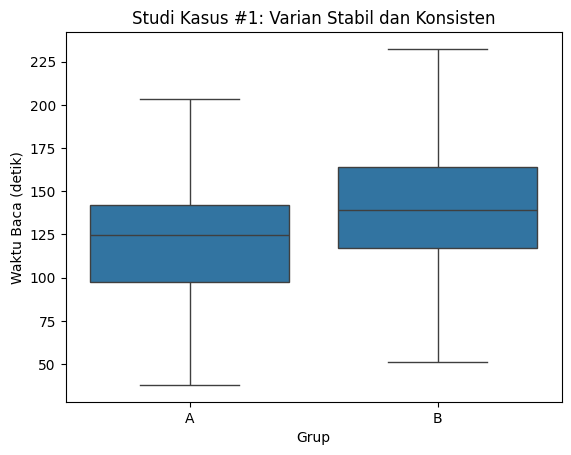

Rata-rata Grup A: 121.52
Rata-rata Grup B: 140.00
P-value Levene's Test: 0.0853


In [8]:
# Visualisasi dengan Boxplot
sns.boxplot(x='grup', y='waktu_baca', data=df_ideal)
plt.title('Studi Kasus #1: Varian Stabil dan Konsisten')
plt.ylabel('Waktu Baca (detik)')
plt.xlabel('Grup')
plt.show()

# Uji homogenitas varian dengan Levene's Test
grup_a_ideal = df_ideal[df_ideal['grup'] == 'A']['waktu_baca']
grup_b_ideal = df_ideal[df_ideal['grup'] == 'B']['waktu_baca']
stat_ideal, p_value_ideal = stats.levene(grup_a_ideal, grup_b_ideal)

# Menampilkan hasil uji dan rata-rata
print(f"Rata-rata Grup A: {grup_a_ideal.mean():.2f}")
print(f"Rata-rata Grup B: {grup_b_ideal.mean():.2f}")
print(f"P-value Levene's Test: {p_value_ideal:.4f}")


## Studi Kasus #2: Kemenangan yang Menipu

### Persiapan Data

In [11]:
# Konfigurasi data untuk skenario berbahaya
np.random.seed(42)
n_samples = 500
# Grup A: Pengalaman konsisten (varian rendah)
waktu_a = np.random.normal(loc=30, scale=5, size=n_samples)
# Grup B: Pengalaman tidak konsisten (varian tinggi)
waktu_b = np.random.normal(loc=33, scale=20, size=n_samples)

# Pastikan tidak ada waktu negatif
waktu_a = np.clip(waktu_a, 5, None)
waktu_b = np.clip(waktu_b, 5, None)

df = pd.DataFrame({
    'grup': ['A'] * n_samples + ['B'] * n_samples,
    'waktu_di_halaman': np.concatenate([waktu_a, waktu_b])
})

print(df.head())

  grup  waktu_di_halaman
0    A         32.483571
1    A         29.308678
2    A         33.238443
3    A         37.615149
4    A         28.829233


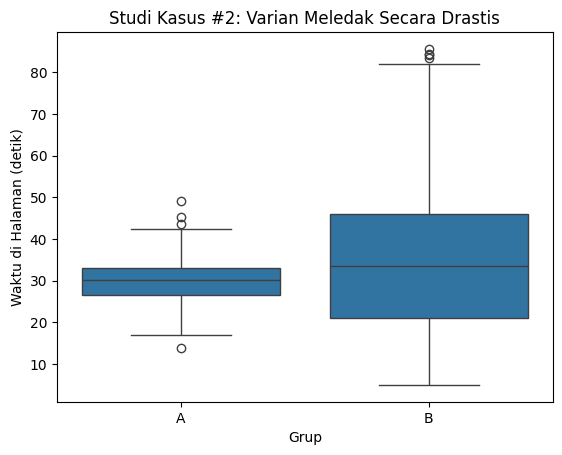

Rata-rata Grup A: 30.03
Rata-rata Grup B: 34.22
P-value Levene's Test: 1.806543768332392e-89


In [12]:
# Visualisasi dengan Boxplot
sns.boxplot(x='grup', y='waktu_di_halaman', data=df)
plt.title('Studi Kasus #2: Varian Meledak Secara Drastis')
plt.ylabel('Waktu di Halaman (detik)')
plt.xlabel('Grup')
plt.show()

# Uji homogenitas varian dengan Levene's Test
grup_a = df[df['grup'] == 'A']['waktu_di_halaman']
grup_b = df[df['grup'] == 'B']['waktu_di_halaman']
stat, p_value = stats.levene(grup_a, grup_b)

# Menampilkan hasil uji dan rata-rata
print(f"Rata-rata Grup A: {grup_a.mean():.2f}")
print(f"Rata-rata Grup B: {grup_b.mean():.2f}")
print(f"P-value Levene's Test: {p_value}")

## Langkah Selanjutnya Jika Varian Berbeda: Welch’s t-test dan Segmentasi

In [13]:
# Contoh penggunaan Welch's t-test
t_stat, p_val_welch = stats.ttest_ind(grup_a, grup_b, equal_var=False)
print(f"P-value dari Welch's t-test: {p_val_welch}")

P-value dari Welch's t-test: 1.2774820512749592e-06
